[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/twMr7/Python-Machine-Learning/blob/master/17-Artificial_Neural_Network_with_tf_Keras.ipynb)

# 17. Artificial Neural Network with tf.Keras

TensorFlow 是 Google 的一個開源函式庫，大多數人常聽到的是如何使用它來做深度學習，事實上 Tensorflow 的設計適用於不同層面的任務。從底層的符號代數函式庫，以及可以用來建構資料流（dataflow）計算圖的 [`tf.Graph`](https://www.tensorflow.org/guide/graphs) 的介面，一直到上層方便應用的 [`tf.keras`](https://www.tensorflow.org/guide/keras) 及 [`tf.estimator.Estimator`](https://www.tensorflow.org/guide/estimators) 介面。 有通用資料輸入流程的 [`tf.data`](https://www.tensorflow.org/guide/datasets) 、適合特徵工程的 [`tf.feature_column`](https://www.tensorflow.org/guide/feature_columns)、以及用於視覺化觀察模型的 [`tensorboard`](https://www.tensorflow.org/tensorboard)，而且有越來越朝向全面性機器學習工具的發展趨勢。

![dataflow graph](image/tensors_flowing.gif)

Keras 則是設計為簡單、易用、方便快速實驗深度類神經網路的函式介面，TensorFlow 是 Keras 所支援的後端引擎的其中一種。 由於 Keras 容易上手，比較廣泛被一般人所接受，後來 TensorFlow 已經把 Keras 內建成為核心函式庫之一。 接下來各章節的範例除了會使用前幾章中介紹過的套件以外，主要會以 **tf.keras** 為主來建構類神經網路：

| 工具函式庫套件      | 網址                                                                    |
|---------------------|-------------------------------------------------------------------------|
| **`numpy`**         | [docs.scipy.org/doc/numpy/](https://docs.scipy.org/doc/numpy/)          |
| **`pandas`**        | [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/)       |
| **`scikit-learn`**  | [scikit-learn.org](https://scikit-learn.org/stable/documentation.html)  |
| **`tensorflow`**    | [www.tensorflow.org](https://www.tensorflow.org/)                       |
| **`keras`**         | [keras.io](https://keras.io/)                                           |


+ [**17.1 類神經網路的基本認識**](#ann-basic)
    - 感知器 Perceptron
    - 類神經網路 Neural Network
    - 定義問題與目標函數
    - 最佳化演算法
+ [**17.2 單神經元類神經網路的 Logistic Regression**](#one-neuron-logistic-regression)
    - Scikit-Learn 內建的 LogisticRegression 模型
    - 用 Keras 建構單一神經元的類神經網路 LogisticRegression 模型
    - 單一神經元網路的學習能力有限
+ [**17.3 多層類神經網路的 Logistic Regression**](#ann-logistic-regression)
    - 用 Keras 建構多層類神經網路 LogisticRegression 模型
    - 學習更複雜的資料模式
+ [**17.4 深度類神經網路的 Softmax Regression**](#dnn-logistic-regression)
    - 多類別分類預測
+ [**參考資料**](#references)


<a id="ann-basic"></a>

## 17.1 類神經網路的基本認識

### § 感知器 Perceptron

一個模擬人類大腦神經連接運作的 [**感知器（perceptron）**](https://en.wikipedia.org/wiki/Perceptron)（1950s）模型如圖，假如 $\mathbf{x} = [x_{1}, x_{2}, x_{3}]^{T}$ 為三個類神經元（artificial neuron）接收到的訊號輸入，每個類神經元都將訊號往下一個有突觸（synapse）相連接的類神經元 $a$ 傳送，每個突觸對訊號的刺激有不同的強弱反應（權重）$\mathbf{w} =  [w_{1}, w_{2}, w_{3}]^{T}$，個別訊號與對應的權重相乘後的總和（$\Sigma$）傳送到 $a$ 成為神經元 $a$ 的輸入，輸入的訊號強弱通過該神經元會激活（$\theta$）一個對應的輸出（$\hat{y}$），計算式為 $\hat{y} = \theta(\mathbf{w}^{T}\mathbf{x})$。

早期感知器的激活函數（activation function）只是單純取門檻值的 [階梯函數（unit step function）](https://en.wikipedia.org/wiki/Heaviside_step_function)，訊號大於 $\theta$ 輸出 1，小於或等於 $\theta$ 的輸出 0。 但是這樣感知器的學習模型還不完整，當輸入訊號都為 0 時，不論權重的值是什麼，激活狀態都會一樣。 為了避免輸入訊號都為 0 就無法順利學習，在不影響原有學習模型下，計算式中加入一個不為零的偏權值（bias）可以巧妙的解決這樣的問題，所以完整的計算模型為 $\hat{y} = \theta(\mathbf{w}^{T}\mathbf{x} + b)$。

![A Perceptron model](image/Perceptron.png)

Perceptron 的學習演算法是重複迭代的步驟，每次輸入訊號向量與權重向量內積後，激活輸出的 $\hat{y}$ 與正確的 $y$ 值的誤差會用來更新權重。設 $t$ 為迭代的次數，$\mathbf{w}_{t+1} = \mathbf{w}_{t} + \eta(y - \hat{y})\cdot \mathbf{x}$，其中 $\eta$ 稱為學習率（learning rate），是事先指定的一個超參數，通常為 $0 < \eta < 1$  的小數。 更新後的權重向量 $\mathbf{w}_{t+1}$ 用來在下一次迭代重新與輸入訊號向量 $\mathbf{x}$ 內積，一直重複這樣的迭代直到 $y - \hat{y}$ 的錯誤收斂到一個可以接受的範圍，或是達到指定的迭代次數為止。

#### 作業練習
+ 只使用 python 及 numpy 函式庫，從頭寫一個感知器的演算法。


### § 類神經網路 Neural Network

Perceptron 是現代多層類神經網路的前身，但是這個感知器模型被證明（[Perceptrons, 1969](https://en.wikipedia.org/wiki/Perceptrons_(book))）只是個學習能力有限的線性模型，間接造成了十幾年的 AI 寒冬，這段期間的研究計劃及商業投資經費大幅縮減，許多研究的計劃書甚至於不敢提到 AI 的字眼。 但仍有不少研究人員認為，仿效人類大腦的神經連接網路，增加神經元以及相互的連接層應該有助於增加學習的能力，但是多神經元節點、多層的學習錯誤要如何決定權重更新的方式？

一直到 [**自動微分（Automatic differentiation)**](https://en.wikipedia.org/wiki/Automatic_differentiation) 方法的出現，被拿來在類神經網路中發展 [**反向傳播（backpropagation）**](https://en.wikipedia.org/wiki/Backpropagation)的方法，[1986年發表的一個方法](https://doi.org/10.1038/323533a0)，結合了 [**梯度下降（gradient descent）**](https://en.wikipedia.org/wiki/Gradient_descent)及誤差反向傳播用來更新權重，可以有效學習並可用於連接任意數量的節點或連接層，終於把類神經網路的技術及實用性往前推向另一個高峰。

![Multilayer Neural Network](image/Multilayer_Neural_Network.png)

類神經網路（ANN, Artificial Neural Network）將多個類神經元節點組成一個隱藏層（hidden layer），在輸入和輸出之間配置一個或多個神經元節點相互連接的隱藏層。 類神經網路時常也可以聽到被稱為 [多層感知器（Multilayer Perceptron）](https://en.wikipedia.org/wiki/Multilayer_perceptron)，但其實與早期的感知器已經不一樣了。 雖然每一個類神經元節點就像是一個感知器，但經過多年改進的 ANN 已不再使用感知器用的階梯激活函數。 現代類神經網路常用的激活函數有 [***logistic sigmoid***](https://en.wikipedia.org/wiki/Logistic_function)、[***hyperbolic tangent***](https://en.wikipedia.org/wiki/Hyperbolic_function)、[***rectified linear unit (ReLU)***](https://en.wikipedia.org/wiki/Rectifier_(neural_networks))、以及 ReLU 的近似函數 [***Softplus***](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)#Softplus)。

![Popular activation functions](image/activation_functions.png)

針對多層的類神經網路，$W$ 為權重，$A$代表激活後的輸出，輸入訊號$X$就看成是第0層的$A$，$g$ 為激活函數，以上標$[\mathit{L}]$代表第 $L$ 層，前向傳播的計算模式可以寫成：

\begin{equation}
                Z^{[\mathit{L}]} = W^{[\mathit{L}]} A^{[\mathit{L} - 1]} + b^{[\mathit{L}]}
\end{equation}

\begin{equation}
                A^{[\mathit{L}]} = g^{[\mathit{L}]}(Z^{[\mathit{L}]})
\end{equation}

前向傳播最後輸出 $\hat{y}$ ，要拿來計算一個學習的目標函數（objective function）。 通常目標函數就是計算輸出的 $\hat{y}$ 與目標 $y$ 的某種誤差評估指標，稱為損失函數（loss function）或成本函數（cost function）。 假設共有 $m$ 筆樣本數據，目標向量 $Y$，前向傳播的輸出 $\hat{Y} = [\hat{y_{1}}, \hat{y_{2}}, ..., \hat{y_{m}}]$，損失函數及成本函數可表示為：

\begin{equation}
    \textbf{Loss function: }\;\; \mathcal{L}(\hat{y_{i}}, y_{i}) \;\; for\;i = 1..m
\end{equation}

\begin{equation}
    \textbf{Cost function: }\;\; J(w, b) = \frac{1}{m} \sum_{i=1}^{m} \mathcal{L}(\hat{y_{i}}, y_{i})
\end{equation}

而類神經網路訓練的過程就是要最小化這個誤差的成本來學習最佳的權重 $w$，最佳化的策略就是採用梯度下降的反向傳播，由計算損失函數的梯度開始，往回逐層計算梯度並更新權重，直到第一層為止。

\begin{equation}
    w = w - \eta \frac{\mathrm{d} J(w)}{\mathrm{d}w}
\end{equation}

![Gradient Descent](./image/gradient_descent.png)


類神經網路的演算法是重複迭代的學習流程，每一次迭代的步驟為：
1. 前向傳播計算（由左至右）。
2. 計算損失函數 $\rightarrow$ 成本函數。
3. 利用梯度下降將誤差反向傳播（由右至左）。

#### 作業練習
+ 只使用 python 及 numpy 函式庫，從頭寫一個類神經網路的演算法。

### § 定義問題與目標函數

ANN 本質上是複雜函數的學習模型，可以用來解決回歸問題，也可以用來處理分類問題。 針對不同的問題，ANN 常使用的[激活函數](https://www.tensorflow.org/api_docs/python/tf/keras/activations)和[損失函數](https://www.tensorflow.org/api_docs/python/tf/keras/losses)的組合如下：

| 問題形式 | 輸出形式                   | 最後一層激活函數                | 損失函數             |
|----------|----------------------------|---------------------------------|----------------------|
| 回歸     | 連續的數值                 | **Linear**                      | **MSE**, **MAE**     |
| 分類     | 二元分類                   | **Sigmoid**                     | **Binary Cross Entropy** |
| 分類     | 多類別預測單一目標類別     | **Softmax** (機率總和為1)       | **Cross Entropy**        |
| 分類     | 多類別預測多目標類別       | **Sigmoid** (各類別有[0-1]機率) | **Binary Cross Entropy** |

#### [**Softmax**](https://en.wikipedia.org/wiki/Softmax_function)

假設共有 $k$ 個目標類別，ANN 最後一層 $k$ 個神經元計算輸入為 $z_{i}, i=1..k$，**softmax** 函數 $\sigma(z_{i})$ 為

\begin{equation}
                \sigma(z_{i}) = \frac{e^{z_{i}}} {\sum_{j=1}^{k} e^{z_{i}}}
\end{equation}


**softmax** 用來將 $z_{i}$ 轉換成各類別出現的機率，轉換結果 $\sum_{i=1}^{k} \sigma(z_{i}) = 1$，即所有類別的機率總和為 1。 二元分類或 *Logistic regression* 所用的 **sigmoid** 函數，其實就是 **softmax** 在類別個數 $k=2$ 時的特例。

TODO: 推導過程及輸出數值透過 softmax 轉換成機率的範例。

#### [**Cross Entropy**](https://en.wikipedia.org/wiki/Cross_entropy)

假設共有$i=1..k$ 個目標類別，$y_{i}$ 是類別標籤（只有一個標籤是機率1，其餘為機率0），ANN 最後一層的輸出為各類別的機率 $\hat{y_{i}},\; i=1..k$，則 **cross entropy** 函數 $H(y, \hat{y})$ 為

\begin{equation}
                H(y, \hat{y}) = - \sum_{i=1}^{k} y_{i} log{\hat{y_{i}}}
\end{equation}

**binary cross entropy** 則是 **cross entropy** 在類別個數是 2 時的特例，所以標籤與輸出的兩個類別機率可分別表示為 $\{y, 1-y\}$ 與 $\{\hat{y}, 1-\hat{y}\}$，則 **binary cross entropy** 可由 **cross entropy** $H(y, \hat{y})$ 推導得出

\begin{equation}
                H(y, \hat{y}) = - y \, log{\hat{y}} - (1 - y) log(1 - \hat{y})
\end{equation}

既然 $\hat{y}$ 是介於 $[0, 1]$ 之間的機率，則 $log{\hat{y}} \le 0$ ，觀察使用 binary cross entropy 為損失函數時，訓練過程如何 minimize $H(y, \hat{y})$ 來達到預期的輸出。 

\begin{equation}
for\; y=1,\; H(y, \hat{y}) = - log{\hat{y}} \;\implies \text{ want}\;log{\hat{y}}\;\textbf{ LARGE}, \text{ such that}\;\hat{y} \to 1
\end{equation}

\begin{equation}
for\; y=0,\; H(y, \hat{y}) = - log{(1-\hat{y})} \;\implies \text{ want}\;log{(1-\hat{y})}\;\textbf{ LARGE}, \text{ such that}\;\hat{y} \to 0
\end{equation}


### § 最佳化演算法

採用梯度下降（[SGD, Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)）的反向傳播來 minimize 類神經網路的 loss function 是有效的學習策略，但是 SGD 並不完美。 例如收斂速度緩慢，不同的初始權重會得到非常不同的收斂結果，初始權重選得不好會造成訓練結果發散，[梯度消失或梯度爆炸](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) 問題。

除了基本的資料正規化（normalization）讓收斂結果比較好以外，有許多[最佳化的方法](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) 被提出來協助改善這些訓練的問題：
+ Momentum
+ AdaGrad
+ Adadelta
+ RMSProp
+ Adam（Momentum + RMSProp）
+ ...

![optimizers](image/optimizers.gif)


In [1]:
# 基本環境設定
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# 工具函式： 畫出二維資料分佈圖
def plot_data(X, y, figsize=None):
    if not figsize:
        figsize = (8, 6)
    plt.figure(figsize=figsize)
    for k in np.unique(y):
        plt.plot(X[y==k, 0], X[y==k, 1], 'o', alpha=0.5, label=k)
    plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
    plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
    plt.legend()

In [3]:
# 工具函式： 畫出 Kearas 訓練歷程記錄的 metrics 曲線
def plot_metrics(history):
    metrics_keys = history.model.metrics_names
    fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10, 6))
    ax[0].set_title('Training Metrics', fontsize=14)
    ax[0].set_ylabel(metrics_keys[0], fontsize=14)
    ax[1].set_ylabel(metrics_keys[1], fontsize=14)
    ax[1].set_xlabel("Epoch", fontsize=14)
    ax[0].plot(history.history[metrics_keys[0]], 'r')
    ax[1].plot(history.history[metrics_keys[1]], 'b')

In [4]:
from matplotlib.colors import ListedColormap
# 工具函式： 畫出二維資料分佈的決策邊界
def plot_decision_boundary(model, X, y, figsize=(11, 8)):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
 
    fig, ax = plt.subplots(figsize=figsize)
    contour = plt.contourf(aa, bb, cc, cmap=plt.cm.RdYlGn, alpha=0.8)
    
    ax_c = fig.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#1f77b4', '#ff7f0e']))
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)

In [5]:
from sklearn.metrics import confusion_matrix
# 工具函式： 畫出分類的混淆矩陣
def plot_confusion_matrix(y, y_pred):
    n_classes = np.unique(y)
    class_labels = ['Class'+str(int(n)) for n in reversed(n_classes)]
    confusion_table = pd.DataFrame(np.fliplr(np.rot90(confusion_matrix(y, y_pred))),
                                   index=class_labels,
                                   columns=class_labels)   
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(confusion_table, annot=True, fmt='d', cmap='RdYlBu', alpha=0.9, vmin=0)    
    ax.set_title('True label', fontsize=14)
    ax.set_ylabel('Predicted label', fontsize=14)

In [6]:
# 工具函式： 生成正弦波分佈模式的資料
def make_sine_wave():
    c = 3
    num = 2400
    step = num / (c*4)
    np.random.seed(0)
    x0 = np.linspace(-c*np.pi, c*np.pi, num)
    x1 = np.sin(x0)
    noise = np.random.normal(0, 0.1, num) + 0.1
    noise = np.sign(x1) * np.abs(noise)
    x1  = x1 + noise
    x0 = x0 + (np.arange(num) / step) * 0.3
    X = np.column_stack((x0, x1))
    y = np.where((np.arange(num) // step) % 2, 1, 0)
    return X, y

In [7]:
# 工具函式： 生成多類別螺旋群聚分佈模式的資料
def make_multiclass(N=500, D=2, K=3):
    """
    N: number of points per class
    D: dimensionality
    K: number of classes
    """
    np.random.seed(0)
    X = np.zeros((N*K, D))
    y = np.zeros(N*K)
    for j in range(K):
        ix = range(N*j, N*(j+1))
        # radius
        r = np.linspace(0.0,1,N)
        # theta
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    return X, y

In [8]:
from matplotlib.colors import ListedColormap
# 工具函式： 畫出多類別二維資料分佈的決策邊界
def plot_multiclass_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c']))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

<a id="one-neuron-logistic-regression"></a>

## 17.2 單神經元類神經網路的 Logistic Regression

Logistic Regression (LR) 是二元分類的模型，以下使用 Scikit-Learn 方便的資料生成函式，先產生方便視覺化的 1000 筆兩個特徵欄位的二維資料當範例，並指定資料包含兩個類別分別各自成一群聚。 所生成的資料將兩個欄位分別當成 x, y 軸畫成散佈圖，可以觀察得出來存在兩個可線性分割的類別。

X_lin shape = (1000, 2)
y_lin shape = (1000,)


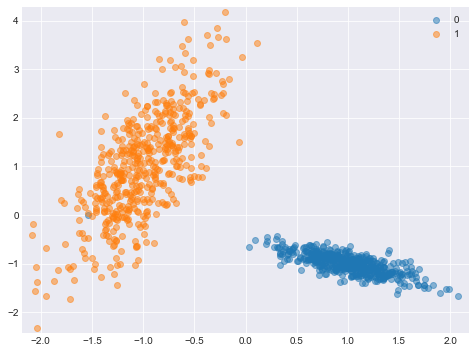

In [9]:
from sklearn.datasets import make_classification

# 產生可線性分割的類別資料
X_lin, y_lin = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                                   n_informative=2, n_clusters_per_class=1, random_state=7)
print('X_lin shape =', X_lin.shape)
print('y_lin shape =', y_lin.shape)
plot_data(X_lin, y_lin)

### § Scikit-Learn 內建的 LogisticRegression 模型

為了簡化範例的說明，暫時先忘記之前學過的要分隔訓練集和測試集、以及要做交叉驗證這些步驟，先套用 Scikit-Learn 裡現成的 [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) 學習模型來看看線性分類的結果。

LR coefficients: [[-4.09049818  2.07274152]]
LR intercept: [-0.27800528]


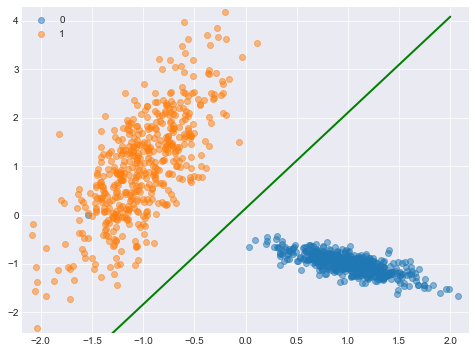

In [10]:
from sklearn.linear_model import LogisticRegression

sklr = LogisticRegression(solver='lbfgs')
sklr.fit(X_lin, y_lin)
print('LR coefficients:', sklr.coef_)
print('LR intercept:', sklr.intercept_)

plot_data(X_lin, y_lin)

limits = np.array([-2, 2])
boundary = -(sklr.coef_[0][0] * limits + sklr.intercept_[0]) / sklr.coef_[0][1]
plt.plot(limits, boundary, "g-", linewidth=2)

### § 用 Keras 建構單一神經元的類神經網路 LogisticRegression 模型

Keras 主要有兩種建構類神經網路模型的方式：
+ [`Sequential`](https://keras.io/getting-started/sequential-model-guide/) model
+ [`Model`](https://keras.io/getting-started/functional-api-guide/) class functional API

以下使用 `Sequential` model 建立簡單的網路模型範例。` Sequential` model 的 API 語法透過一層一層疊加的方式來指定網路的結構，由於生成的資料只需要線性模型，可以用一個沒有隱藏層的結構，輸入資料直接接到一個輸出的神經單元（unit），用二元分類最合適的 *logistic sigmoid* 激活輸出，然後就計算 *binary cross-entropy* 的 loss。 基本流程需要指定：網路結構、訓練方法、訓練資料配置。

#### 網路結構
建立 [`Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential) 物件並配置網路 [`layer`](https://www.tensorflow.org/api_docs/python/tf/keras/layers) 結構，基本步驟如下：
1. 加入一個節點全部連接的`Dense`層，指定 1 個神經單元（又稱節點，node）`units=1`。
2. `Sequential`模型不指定`Input`層（這也是ANN的慣例，輸入不算一層），所以第一層一定要指定輸入資料的維度大小，網路的其他層可以自動推算。 生成的資料有兩個欄位（維度2），所以要指定`input_shape=(2,)`。
3. 指定第一層也是輸出層的激活函數名稱或加入`Activation`激活層，使用`'sigmoid'`激活函數輸出結果。

#### 訓練方法
網路結構及模型物件建立後，使用物件的 [`compile`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#compile) 方法指定套用訓練的方法，主要需要配置：
1. 梯度下降的[最佳化](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)方法，如 `optimizer='adam'`。
2. [損失函數](https://www.tensorflow.org/api_docs/python/tf/keras/losses)，選擇適合二元分類的 `loss='binary_crossentropy'`。
3. 模型預測力的[評估指標](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)，選擇適合分類的正確率 `metrics=['accuracy']`。

#### 訓練資料配置
然後就可以用模型物件的 [`fit`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#fit) 方法來訓練。 類神經網路的演算法是可以用大批量（batch）樣本向量式處理的，如果沒有指定預設會使用所有樣本一次批量處理，但是如果輸入資料龐大而電腦的記憶體受限時，也可以指定每一次迭代只使用部分小批量（mini-batch）。 主要需要指定：
1. 輸入的訓練資料 `x=X_lin`。
2. 訓練的目標標籤 `y=y_lin`。
3. 每次迭代的小批量樣本數，如 `batch_size=128`。
4. 總共要訓練幾個世代（輸入資料全部用過一輪叫一個 epoch），如 `epochs=50`。

根據以上的設定，輸入資料維度是 `(2,)`，資料總樣本數為 1000 筆，如果不用小批量訓練（設定`batch_size=None`），則每一次迭代就是使用 `(1000,2)` 大小的陣列資料來計算前向及反向傳播，一次迭代就是一個 epoch。 如果指定小批量訓練大小為 128（設定`batch_size=128`），則每一次迭代使用 `(128,2)` 大小的陣列資料來計算前向及反向傳播，總共要 8 次的迭代才算一個 epoch（七次`(128,2)` + 最後一次`(104,2)`）。

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# 配置模型的網路結構： 方法一
# 在產生 Sequential 物件時直接指定 layer 物件的清單
nnlr = Sequential([
    Dense(units=1, input_shape=(2,)),
    Activation('sigmoid')
])

# 配置模型的網路結構： 方法二
# 使用 add() 一層一層的 layer 物件慢慢加
'''
nnlr = Sequential()
nnlr.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
'''

# 模型結構大小摘要
nnlr.summary()

# 指定套用學習/訓練的方法
nnlr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 指定訓練資料的配置，開始訓練
history = nnlr.fit(x=X_lin, y=y_lin, batch_size=None, epochs=50, verbose=1)

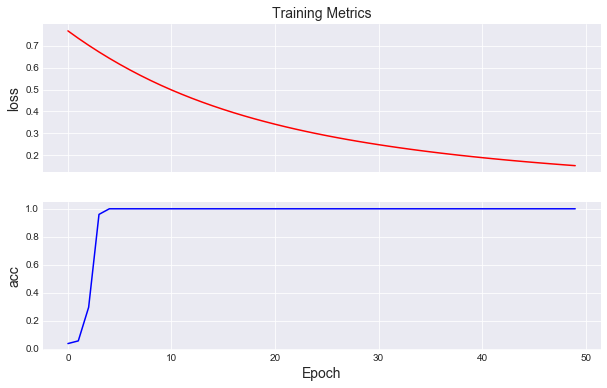

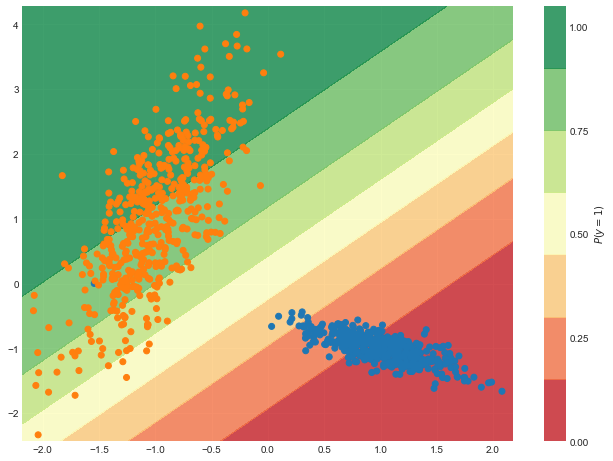

In [12]:
# 觀察訓練過程的 accuracy 與 loss 值
plot_metrics(history)
# 觀察訓練結果的決策邊界
plot_decision_boundary(nnlr, X_lin, y_lin)

真實 Y： Class0 501 筆 + Class1 499 筆
預測 Y： Class0 500 筆 + Class1 500 筆


Recall       1.000
Precision    0.998
Accuracy     0.999
dtype: float64

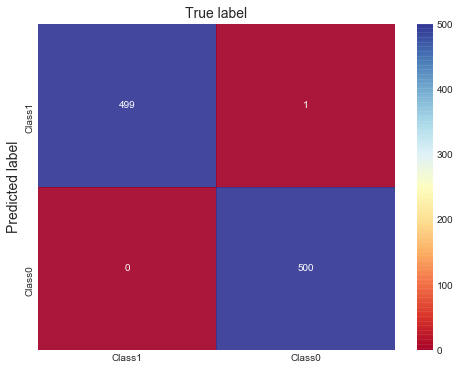

In [13]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

y_lin_pred = nnlr.predict_classes(X_lin, verbose=0)

# 顯示分類結果報告
tclass, tcount = np.unique(y_lin, return_counts=True)
pclass, pcount = np.unique(y_lin_pred, return_counts=True)
print('真實 Y： Class{} {} 筆 + Class{} {} 筆'.format(tclass[0], tcount[0], tclass[1], tcount[1]))
print('預測 Y： Class{} {} 筆 + Class{} {} 筆'.format(pclass[0], pcount[0], pclass[1], pcount[1]))
# 分類效能指標
display(pd.Series({'Recall': recall_score(y_lin, y_lin_pred),
                   'Precision': precision_score(y_lin, y_lin_pred),
                   'Accuracy': accuracy_score(y_lin, y_lin_pred)}))

# 劃出 confusion 矩陣
plot_confusion_matrix(y_lin, y_lin_pred)

### § 單一神經元網路的學習能力有限

前面範例建構的類神經網路模型 `nnlr`，是類似感知器 Perceptron 的單一神經元結構，儘管使用的是 sigmoid 激活函數，但終究也是 step function 的連續可微的近似版本而已。 已知這種結構的類神經網路只具備線性模型的學習能力，可以把這個模型拿來學習分佈複雜一點的資料試試。

#### Moons 分佈資料

Scikit-Learn 的 `make_moons` 可以產生兩群交錯的像上下弦月的分佈資料，可以看得出來稍微複雜一點，不是單純線性分割就可以分類得好的。

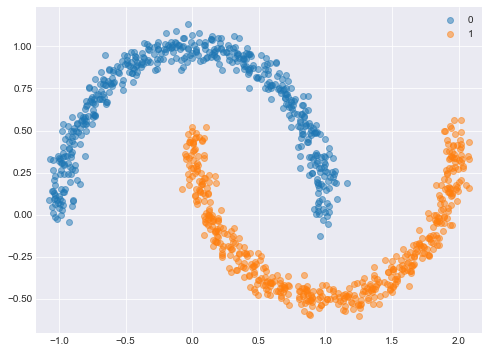

In [14]:
from sklearn.datasets import make_moons

X_moon, y_moon = make_moons(n_samples=1000, noise=0.05, random_state=0)
plot_data(X_moon, y_moon)

In [ ]:
# 使用 moon 分佈資料重新訓練 nnlr
history = nnlr.fit(x=X_moon, y=y_moon, batch_size=None, epochs=100, verbose=1)

訓練的結果 loss 到某個點以後下降就趨緩，沒辦法像線性可分割的資料那樣分類得那麼準確了。 決策邊界範圍擴大變得模糊，confusion 矩陣也可以看得出來預測錯誤變多了。

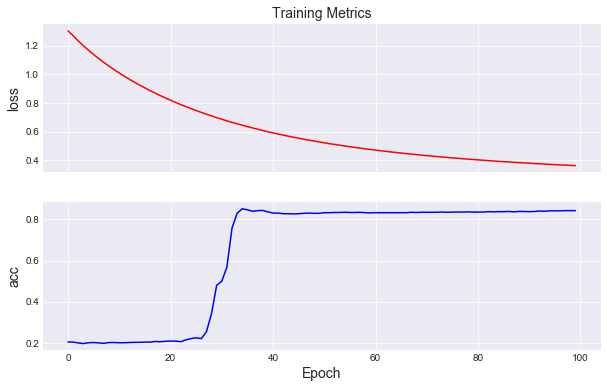

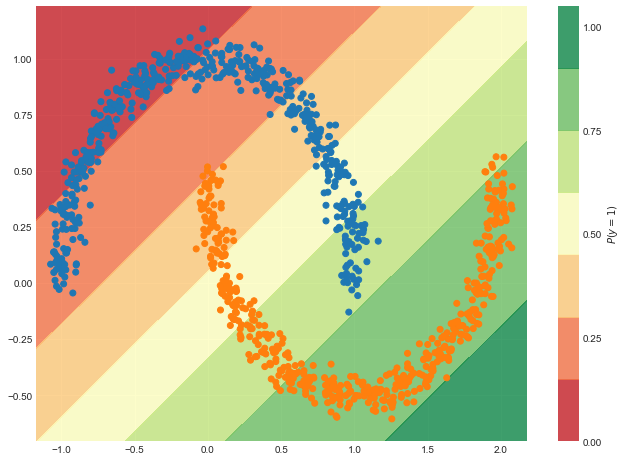

In [16]:
# 觀察訓練過程的 accuracy 與 loss 值
plot_metrics(history)
# 觀察訓練結果的決策邊界
plot_decision_boundary(nnlr, X_moon, y_moon)

真實 Y： Class0 500 筆 + Class1 500 筆
預測 Y： Class0 496 筆 + Class1 504 筆


Recall       0.84800
Precision    0.84127
Accuracy     0.84400
dtype: float64

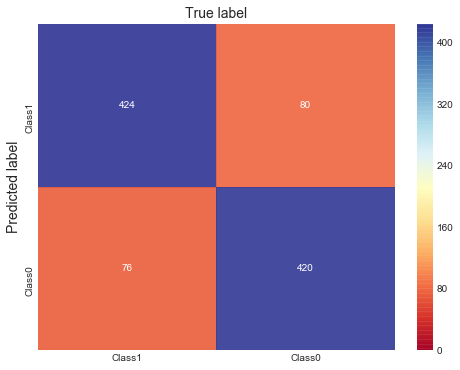

In [17]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

y_moon_pred = nnlr.predict_classes(X_moon, verbose=0)

# 顯示分類結果報告
tclass, tcount = np.unique(y_moon, return_counts=True)
pclass, pcount = np.unique(y_moon_pred, return_counts=True)
print('真實 Y： Class{} {} 筆 + Class{} {} 筆'.format(tclass[0], tcount[0], tclass[1], tcount[1]))
print('預測 Y： Class{} {} 筆 + Class{} {} 筆'.format(pclass[0], pcount[0], pclass[1], pcount[1]))
# 分類效能指標
display(pd.Series({'Recall': recall_score(y_moon, y_moon_pred),
                   'Precision': precision_score(y_moon, y_moon_pred),
                   'Accuracy': accuracy_score(y_moon, y_moon_pred)}))

# 劃出 confusion 矩陣
plot_confusion_matrix(y_moon, y_moon_pred)

#### Circles 分佈資料

Scikit-Learn 的 `make_circles` 可以產生兩群圓圈分佈的資料，一群小圓圈被圍在另一群大圓圈中間，完全沒有線性分割就可以作決策的空間。

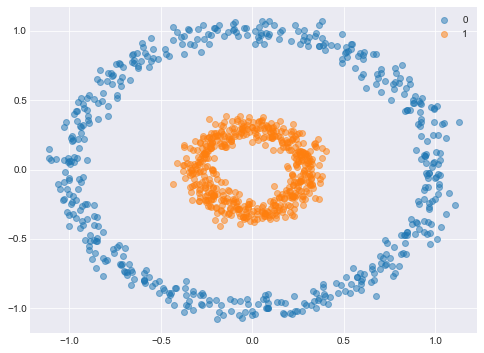

In [18]:
from sklearn.datasets import make_circles

X_circ, y_circ = make_circles(n_samples=1000, noise=0.05, factor=0.3, random_state=0)
plot_data(X_circ, y_circ)

In [ ]:
# 使用 circle 分佈資料重新訓練 nnlr
history = nnlr.fit(x=X_circ, y=y_circ, batch_size=None, epochs=100, verbose=1)

訓練的結果看起來根本沒有學習能力，loss 幾乎沒辦法下降，預測準確度只跟瞎猜的差不多。 決策邊界擴大到幾乎沒有差異，confusion 矩陣從顏色就可以看得出來猜對的跟猜錯的差不多。

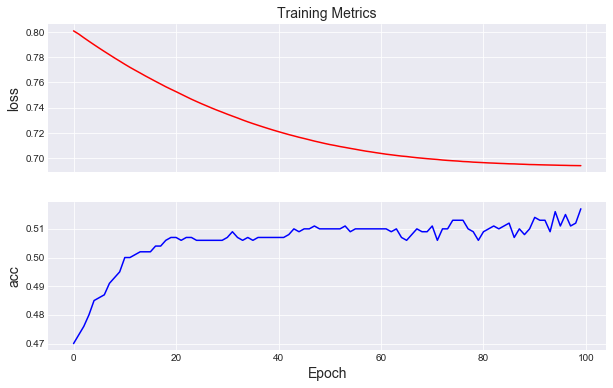

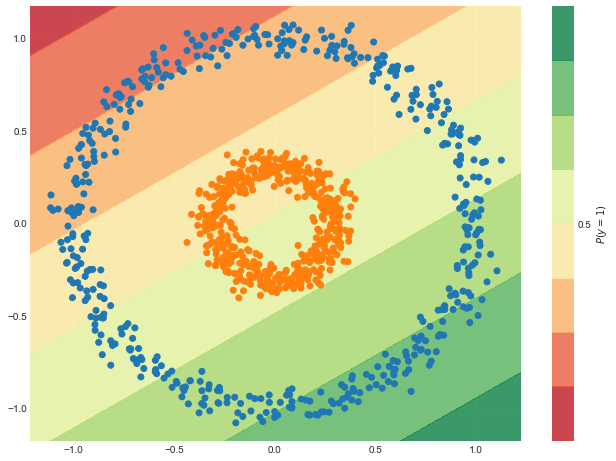

In [20]:
# 觀察訓練過程的 accuracy 與 loss 值
plot_metrics(history)
# 觀察訓練結果的決策邊界
plot_decision_boundary(nnlr, X_circ, y_circ)

真實 Y： Class0 500 筆 + Class1 500 筆
預測 Y： Class0 467 筆 + Class1 533 筆


Recall       0.550000
Precision    0.515947
Accuracy     0.517000
dtype: float64

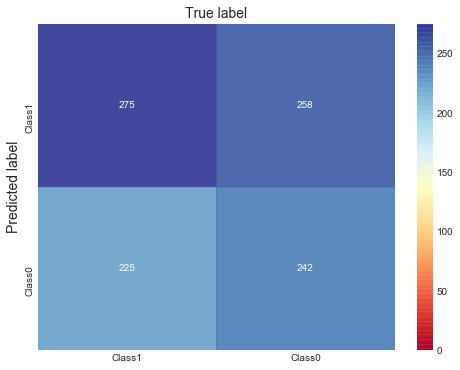

In [21]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

y_circ_pred = nnlr.predict_classes(X_circ, verbose=0)

# 顯示分類結果報告
tclass, tcount = np.unique(y_circ, return_counts=True)
pclass, pcount = np.unique(y_circ_pred, return_counts=True)
print('真實 Y： Class{} {} 筆 + Class{} {} 筆'.format(tclass[0], tcount[0], tclass[1], tcount[1]))
print('預測 Y： Class{} {} 筆 + Class{} {} 筆'.format(pclass[0], pcount[0], pclass[1], pcount[1]))
# 分類效能指標
display(pd.Series({'Recall': recall_score(y_circ, y_circ_pred),
                   'Precision': precision_score(y_circ, y_circ_pred),
                   'Accuracy': accuracy_score(y_circ, y_circ_pred)}))

# 劃出 confusion 矩陣
plot_confusion_matrix(y_circ, y_circ_pred)

<a id="ann-logistic-regression"></a>

## 17.3 多層類神經網路的 Logistic Regression

### § 用 Keras 建構多層類神經網路 LogisticRegression 模型

當網路結構不足以學習複雜資料集時，擴張節點數（增廣）、增加隱藏層（加深）是一個可以先嘗試的策略。 除非訓練資料量太少，要不然通常不會因為一層又一層的堆疊而降低學習的能力。

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 建立 Sequential 物件，指定網路結構配置
annlr = Sequential([
    Dense(units=4, activation='tanh', input_shape=(2,)),
    Dense(units=2, activation='tanh'),
    Dense(units=1, activation='sigmoid')
])

# 模型結構大小摘要
annlr.summary()

# 指定套用學習/訓練的方法
# 注意： optimizer 明確指定自己建立的物件，這樣可以設定額外的超參數，如學習率（lr, learning rate）
annlr.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# 指定訓練資料的配置，開始訓練
history = annlr.fit(x=X_moon, y=y_moon, batch_size=None, epochs=100, verbose=1)

三層的 ANN（2個隱藏層 + 1個輸出層）其實還只是淺層網路，節點數也不多，要訓練的參數總共也才 25 個。 但是這個網路已經可以把 moons 資料的分佈模式精準的學習起來，約 100 個 epochs 以內就已經收斂到 loss 趨近 0 的百分之百準確度，決策邊界非常清楚的在精確的範圍內。

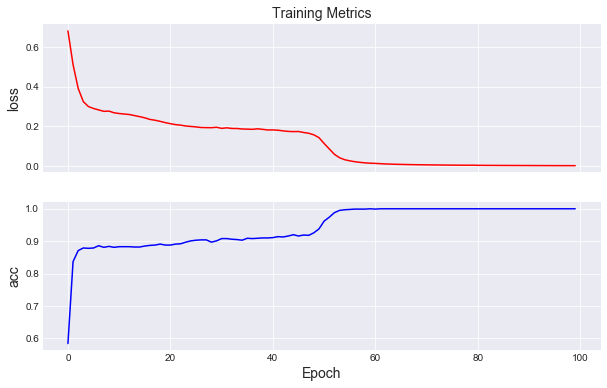

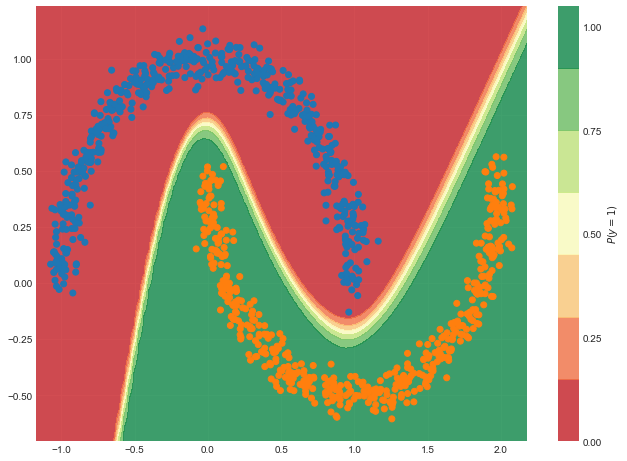

In [23]:
# 觀察訓練過程的 accuracy 與 loss 值
plot_metrics(history)
# 觀察訓練結果的決策邊界
plot_decision_boundary(annlr, X_moon, y_moon)

真實 Y： Class0 500 筆 + Class1 500 筆
預測 Y： Class0 500 筆 + Class1 500 筆


Recall       1.0
Precision    1.0
Accuracy     1.0
dtype: float64

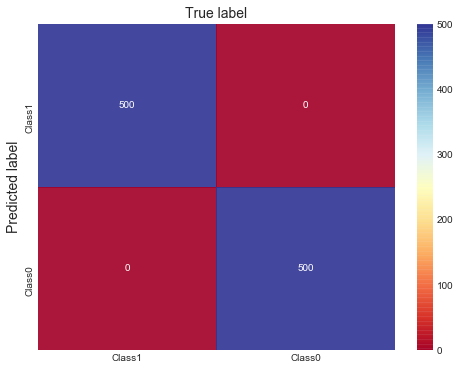

In [24]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

y_moon_pred = annlr.predict_classes(X_moon, verbose=0)

# 顯示分類結果報告
tclass, tcount = np.unique(y_moon, return_counts=True)
pclass, pcount = np.unique(y_moon_pred, return_counts=True)
print('真實 Y： Class{} {} 筆 + Class{} {} 筆'.format(tclass[0], tcount[0], tclass[1], tcount[1]))
print('預測 Y： Class{} {} 筆 + Class{} {} 筆'.format(pclass[0], pcount[0], pclass[1], pcount[1]))
# 分類效能指標
display(pd.Series({'Recall': recall_score(y_moon, y_moon_pred),
                   'Precision': precision_score(y_moon, y_moon_pred),
                   'Accuracy': accuracy_score(y_moon, y_moon_pred)}))

# 劃出 confusion 矩陣
plot_confusion_matrix(y_moon, y_moon_pred)

同一個網路結構用來學習 Circles 分佈的資料，應該也是小菜一碟而已。

In [ ]:
history = annlr.fit(x=X_circ, y=y_circ, batch_size=None, epochs=100, verbose=1)

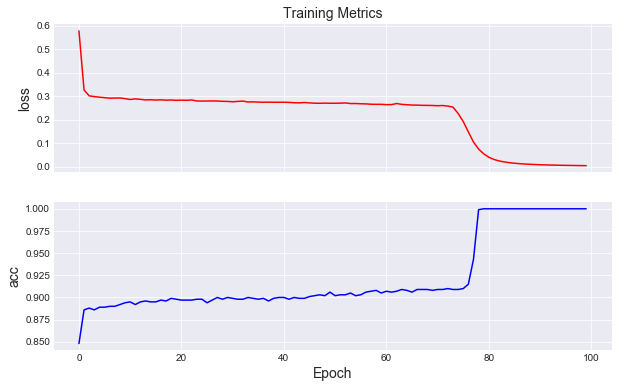

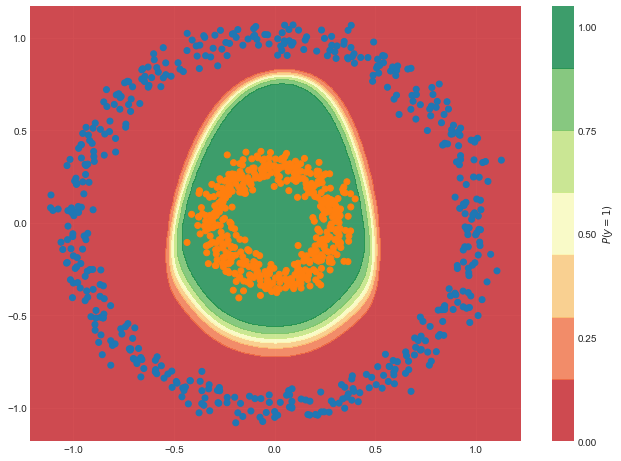

In [26]:
# 觀察訓練過程的 accuracy 與 loss 值
plot_metrics(history)
# 觀察訓練結果的決策邊界
plot_decision_boundary(annlr, X_circ, y_circ)

真實 Y： Class0 500 筆 + Class1 500 筆
預測 Y： Class0 500 筆 + Class1 500 筆


Recall       1.0
Precision    1.0
Accuracy     1.0
dtype: float64

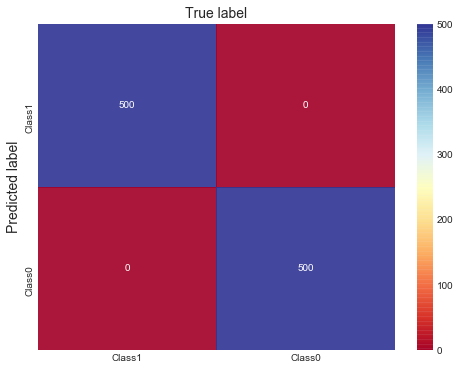

In [27]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

y_circ_pred = annlr.predict_classes(X_circ, verbose=0)

# 顯示分類結果報告
tclass, tcount = np.unique(y_circ, return_counts=True)
pclass, pcount = np.unique(y_circ_pred, return_counts=True)
print('真實 Y： Class{} {} 筆 + Class{} {} 筆'.format(tclass[0], tcount[0], tclass[1], tcount[1]))
print('預測 Y： Class{} {} 筆 + Class{} {} 筆'.format(pclass[0], pcount[0], pclass[1], pcount[1]))
# 分類效能指標
display(pd.Series({'Recall': recall_score(y_circ, y_circ_pred),
                   'Precision': precision_score(y_circ, y_circ_pred),
                   'Accuracy': accuracy_score(y_circ, y_circ_pred)}))

# 劃出 confusion 矩陣
plot_confusion_matrix(y_circ, y_circ_pred)

### § 學習更複雜的資料模式

#### Sine 分佈資料

Moons 和 Circles 的資料分佈模式，雖然製造了線性模型的學習門檻，有比較複雜的決策邊界，但也是單一連續決策邊界就足以準確分類的。 類神經網路可以有能力學習比這些更複雜的資料模式，用有兩群交錯的正弦波分佈模式來試試，這個資料分佈是沒有辦法一個連續決策邊界就解決的。

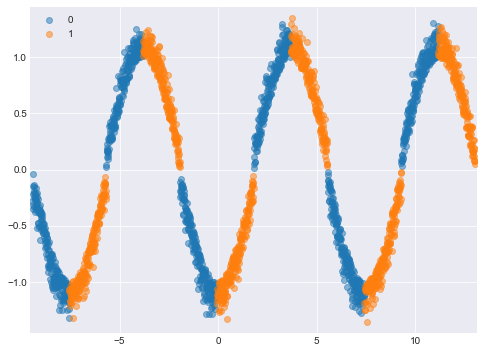

In [28]:
# 產生正弦波分佈模式的資料
X_sine, y_sine = make_sine_wave()

plot_data(X_sine, y_sine)

可以用剛剛的 `annlr` 試試，不過預期結果應該不會太好。 不用多考慮，直接增加節點及隱藏層試看看。 要幾個節點幾個隱藏層才會適合這個資料模式的複雜度？ 目前並沒有一個評估的標準可以提供適合的選擇方式，通常還是要用 trial-and-error 的方式來決定。

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 建立 Sequential 物件，指定網路結構配置
annlr2 = Sequential([
    Dense(units=64, activation='tanh', input_shape=(2,)),
    Dense(units=56, activation='tanh'),
    Dense(units=48, activation='tanh'),
    Dense(units=1, activation='sigmoid')
])

# 模型結構大小摘要
annlr2.summary()

# 指定套用學習/訓練的方法
annlr2.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 指定訓練資料的配置，開始訓練
history = annlr2.fit(x=X_sine, y=y_sine, batch_size=None, epochs=250, verbose=1)

這個 `annlr2` 的網路結構多加了一層，三層隱藏層 + 一層輸出層共四層。 除此之外，每一個隱藏層的節點數都大幅增加，更新權重的學習率（learning rate）降低了十分之一，總更新次數拉長到 250 個世代。 這樣的配置已經可以學習到複雜函數的非連續決策邊界，雖然沒有一個明確要如何增加、要增加多少的遵循規則，不過這個範例仍然相當符合經驗法則：當網路結構相對簡單，學不起來複雜函數的時候，增加節點數和增加隱藏層數通常有幫助。

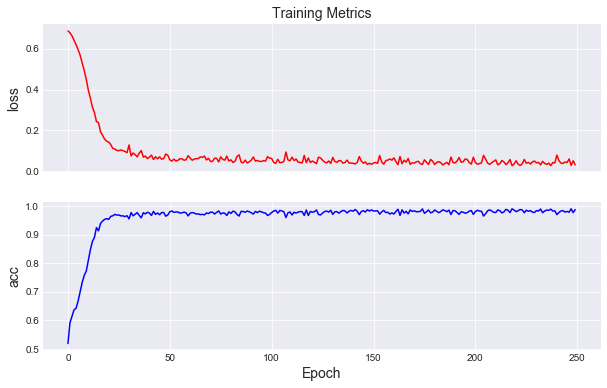

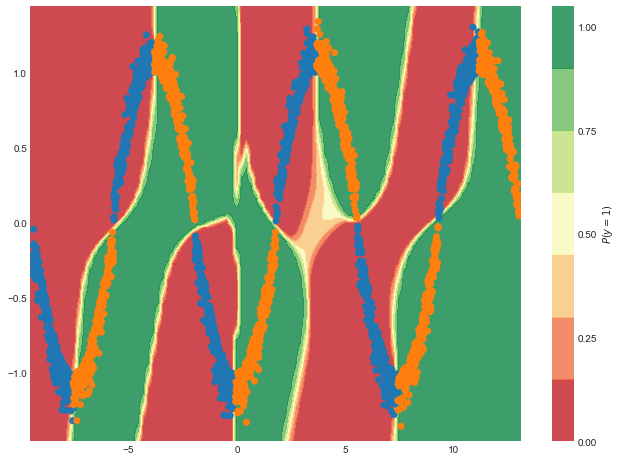

In [30]:
# 觀察訓練過程的 accuracy 與 loss 值
plot_metrics(history)
# 觀察訓練結果的決策邊界
plot_decision_boundary(annlr2, X_sine, y_sine)

真實 Y： Class0 1200 筆 + Class1 1200 筆
預測 Y： Class0 1177 筆 + Class1 1223 筆


Recall       0.995000
Precision    0.976288
Accuracy     0.985417
dtype: float64

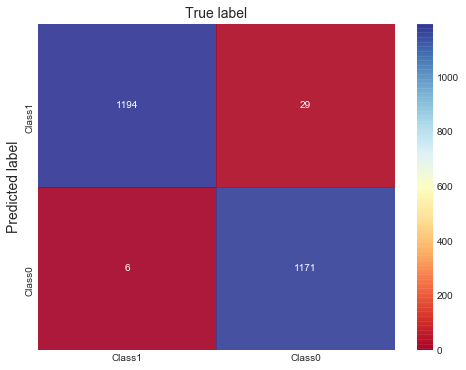

In [31]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

y_sine_pred = annlr2.predict_classes(X_sine, verbose=0)

# 顯示分類結果報告
tclass, tcount = np.unique(y_sine, return_counts=True)
pclass, pcount = np.unique(y_sine_pred, return_counts=True)
print('真實 Y： Class{} {} 筆 + Class{} {} 筆'.format(tclass[0], tcount[0], tclass[1], tcount[1]))
print('預測 Y： Class{} {} 筆 + Class{} {} 筆'.format(pclass[0], pcount[0], pclass[1], pcount[1]))
# 分類效能指標
display(pd.Series({'Recall': recall_score(y_sine, y_sine_pred),
                   'Precision': precision_score(y_sine, y_sine_pred),
                   'Accuracy': accuracy_score(y_sine, y_sine_pred)}))

# 劃出 confusion 矩陣
plot_confusion_matrix(y_sine, y_sine_pred)

<a id="dnn-softmax-regression"></a>

## 17.4 深度類神經網路的 Softmax Regression

再把難度提高一點，前面都是兩個類別資料的二元分類問題，接下來試試多類別資料的分類問題。

### § 多類別分類預測

產生的資料內含三個類別呈現螺旋狀交錯分佈，輸入的每一筆二維資料 X 對應到輸出 y 的其中一個類別 [0, 1, 2]。

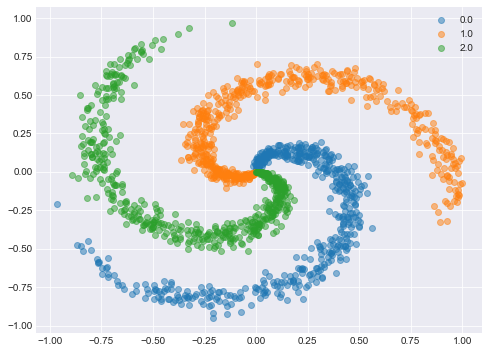

In [32]:
# 產生三類別，螺旋群聚分佈模式的資料
X_multi, y_multi = make_multiclass(K=3)

plot_data(X_multi, y_multi)

與二元分類不同的，多類別資料要預測單一目標類別，有 k 個類別最後一層的輸出就給 k 個節點，激活函數常用的是 **softmax**，損失函數則是常用 **cross entropy**。 另外，二元分類的 y 包含 [0, 1] 兩種離散的類別值 ，可以直接給模型的 `fit` 來訓練。 三種類別時 y 包含 [0, 1, 2]，需要先轉成 **one-hot** 編碼，這可以使用 keras 提供的工具函式 `to_categorical` 來完成。

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 建立 Sequential 物件，指定網路結構配置
dnnsc = Sequential([
    Dense(units=64, activation='tanh', input_shape=(2,)),
    Dense(units=32, activation='tanh'),
    Dense(units=16, activation='tanh'),
    Dense(units=3, activation='softmax')
])

# 模型結構大小摘要
dnnsc.summary()

# 指定套用學習/訓練的方法
dnnsc.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# 轉成類別的 one-hot 編碼
y_multi_cat = keras.utils.to_categorical(y_multi)

# 指定訓練資料的配置，開始訓練
history = dnnsc.fit(x=X_multi, y=y_multi_cat, batch_size=None, epochs=50, verbose=1)

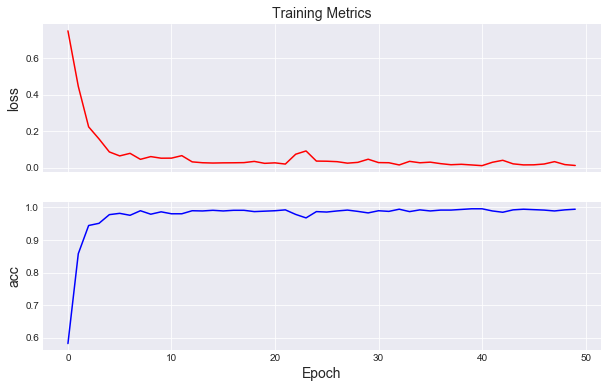

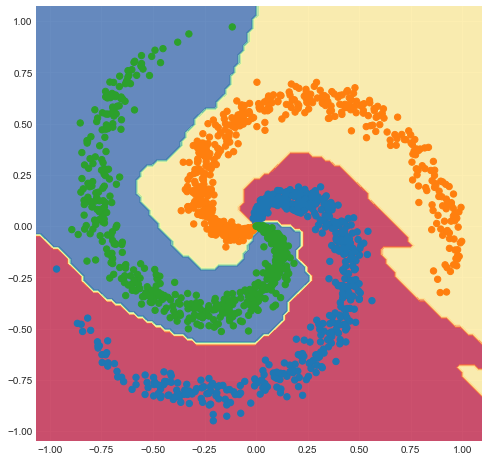

In [34]:
# 觀察訓練過程的 accuracy 與 loss 值
plot_metrics(history)
# 觀察訓練結果的決策邊界
plot_multiclass_decision_boundary(dnnsc, X_multi, y_multi)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       500
         1.0       1.00      0.99      0.99       500
         2.0       0.98      1.00      0.99       500

   micro avg       0.99      0.99      0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



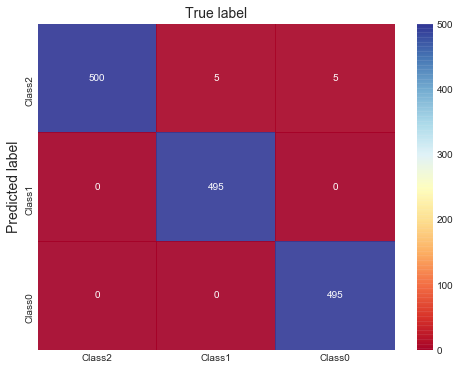

In [35]:
from sklearn.metrics import classification_report

y_multi_pred = dnnsc.predict_classes(X_multi, verbose=0)

# 顯示分類結果報告
print(classification_report(y_multi, y_multi_pred))

# 劃出 confusion 矩陣
plot_confusion_matrix(y_multi, y_multi_pred)

<a id="references"></a>

## References:
+ S. Marsland. *"Machine Learning: An Algorithmic Perspective"*. CRC Press, New Jersey, USA, 2 edition, 2014. [[link]](https://seat.massey.ac.nz/personal/s.r.marsland/mlbook.html)
+ A. Dertat, *"Applied Deep Learning - Part 1: Artificial Neural Networks"*, Towards Data Science, 2017. [[link]](https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6)
+ S. Ronaghan, *"Deep Learning: Which Loss and Activation Functions should I use?"*, Towards Data Science, 2018. [[link]](https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8)